In [1]:
import pandas as pd
import konlpy
import gensim
import tensorflow as tf

print(pd.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.3
0.5.2
4.1.2


In [2]:
train_data = pd.read_table('./ratings_train.txt')
test_data = pd.read_table('./ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

X_train

[[32, 74, 919, 4, 4, 39, 228, 20, 33, 748],
 [1028, 4, 11, 519, 549, 687, 5, 120, 4, 70, 1639, 52, 925, 1006, 15, 44, 391],
 [24, 205, 3],
 [8409, 158, 3925, 4, 4, 298, 94, 17, 6, 4, 4, 58, 3479],
 [3,
  8894,
  1108,
  52,
  2832,
  60,
  5,
  14,
  2758,
  41,
  1188,
  35,
  351,
  42,
  22,
  40,
  60,
  3,
  3,
  427,
  3102,
  1766,
  6],
 [675,
  3,
  3,
  131,
  420,
  185,
  1547,
  712,
  65,
  1694,
  715,
  53,
  375,
  192,
  271,
  5,
  4,
  69,
  4,
  11,
  2179,
  122,
  750,
  4],
 [253, 381, 9, 384, 2012, 55, 15, 817, 6, 4],
 [232,
  1450,
  144,
  6,
  425,
  756,
  3,
  3,
  52,
  1532,
  290,
  99,
  250,
  4,
  4,
  28,
  855,
  29,
  353,
  652,
  540,
  509,
  583,
  6,
  3318,
  4,
  8895,
  22,
  1460,
  1460,
  4,
  4,
  71,
  304,
  17,
  6,
  52,
  104,
  8,
  77,
  22,
  3,
  43],
 [128, 17, 23, 94, 16, 290, 27, 48, 5],
 [63,
  656,
  58,
  240,
  760,
  18,
  574,
  89,
  3,
  4,
  4,
  1482,
  637,
  736,
  81,
  22,
  24,
  3,
  16,
  20,
  18],
 [3, 4,

In [4]:
new_X_train = []

for i in X_train:
    train_list = []
    
    for j in i:
        train_list.append(j + 1)
    
    new_X_train.append(train_list)
    
X_train = new_X_train
X_train

[[33, 75, 920, 5, 5, 40, 229, 21, 34, 749],
 [1029, 5, 12, 520, 550, 688, 6, 121, 5, 71, 1640, 53, 926, 1007, 16, 45, 392],
 [25, 206, 4],
 [8410, 159, 3926, 5, 5, 299, 95, 18, 7, 5, 5, 59, 3480],
 [4,
  8895,
  1109,
  53,
  2833,
  61,
  6,
  15,
  2759,
  42,
  1189,
  36,
  352,
  43,
  23,
  41,
  61,
  4,
  4,
  428,
  3103,
  1767,
  7],
 [676,
  4,
  4,
  132,
  421,
  186,
  1548,
  713,
  66,
  1695,
  716,
  54,
  376,
  193,
  272,
  6,
  5,
  70,
  5,
  12,
  2180,
  123,
  751,
  5],
 [254, 382, 10, 385, 2013, 56, 16, 818, 7, 5],
 [233,
  1451,
  145,
  7,
  426,
  757,
  4,
  4,
  53,
  1533,
  291,
  100,
  251,
  5,
  5,
  29,
  856,
  30,
  354,
  653,
  541,
  510,
  584,
  7,
  3319,
  5,
  8896,
  23,
  1461,
  1461,
  5,
  5,
  72,
  305,
  18,
  7,
  53,
  105,
  9,
  78,
  23,
  4,
  44],
 [129, 18, 24, 95, 17, 291, 28, 49, 6],
 [64,
  657,
  59,
  241,
  761,
  19,
  575,
  90,
  4,
  5,
  5,
  1483,
  638,
  737,
  82,
  23,
  25,
  4,
  17,
  21,
  19],
 [4, 

In [5]:
index_to_word = {index:word for word, index in word_to_index.items()}
len(index_to_word)

9997

In [6]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [7]:
word_to_index = {k:(v+1) for k,v in word_to_index.items()}

word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

In [8]:
index_to_word[4]

''

In [9]:
print(X_train[0])
print(get_decoded_sentence(X_train[0], index_to_word))

[33, 75, 920, 5, 5, 40, 229, 21, 34, 749]
더 빙 . . 진짜 짜증 나 네요 목소리


In [10]:
print(get_decoded_sentence(X_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

더 빙 . . 진짜 짜증 나 네요 목소리
라벨:  0


In [11]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


In [12]:
word_to_index["<PAD>"]

0

In [13]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

print(X_train.shape)

(146182, 41)


In [14]:
vocab_size = 10000+1    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(units=1, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000100   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,117,477
Trainable params: 1,117,477
Non-trainable params: 0
_________________________________________________________________


In [15]:
# validation set 10000건 분리
x_val = X_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = X_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(136182, 41)
(136182,)


In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=30  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/30
266/266 [==============================] - 27s 12ms/step - loss: 0.4109 - accuracy: 0.4984 - val_loss: 0.3393 - val_accuracy: 0.4973
Epoch 2/30
266/266 [==============================] - 3s 10ms/step - loss: 0.3177 - accuracy: 0.4984 - val_loss: 0.3236 - val_accuracy: 0.4973
Epoch 3/30
266/266 [==============================] - 3s 10ms/step - loss: 0.2863 - accuracy: 0.4984 - val_loss: 0.3213 - val_accuracy: 0.4973
Epoch 4/30
266/266 [==============================] - 3s 10ms/step - loss: 0.2587 - accuracy: 0.4984 - val_loss: 0.3244 - val_accuracy: 0.4973
Epoch 5/30
266/266 [==============================] - 3s 10ms/step - loss: 0.2342 - accuracy: 0.4984 - val_loss: 0.3443 - val_accuracy: 0.4973
Epoch 6/30
266/266 [==============================] - 3s 10ms/step - loss: 0.2115 - accuracy: 0.4984 - val_loss: 0.3628 - val_accuracy: 0.4973
Epoch 7/30
266/266 [==============================] - 3s 10ms/step - loss: 0.1912 - accuracy: 0.4984 - val_loss: 0.3694 - val_accuracy: 0.497

In [17]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


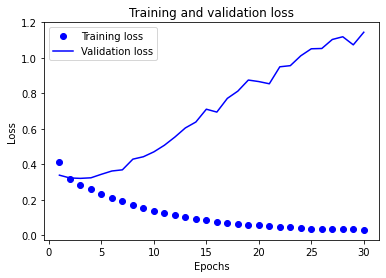

In [18]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

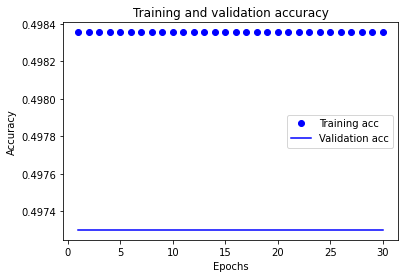

In [19]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10001, 100)


In [21]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = 'word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, 100))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [22]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)


In [23]:
word_vectors.similar_by_word("love")

[('완소', 0.9496984481811523),
 ('잼따', 0.9456537961959839),
 ('조음', 0.9407837986946106),
 ('눈물나', 0.9384663105010986),
 ('새록새록', 0.9381399750709534),
 ('예뻐요', 0.9361420273780823),
 ('염', 0.9342324733734131),
 ('울컥', 0.9334073662757874),
 ('신들린', 0.9325010776519775),
 ('찰리채플린', 0.9324581623077393)]

In [24]:
from gensim.models import KeyedVectors

word2vec_path ='./GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [25]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

In [26]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [27]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 41, 300)           3000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 35, 16)            33616     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 7, 16)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [28]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
266/266 [==============================] - 18s 9ms/step - loss: 0.5456 - accuracy: 0.7046 - val_loss: 0.3942 - val_accuracy: 0.8243
Epoch 2/20
266/266 [==============================] - 2s 7ms/step - loss: 0.3565 - accuracy: 0.8442 - val_loss: 0.3424 - val_accuracy: 0.8510
Epoch 3/20
266/266 [==============================] - 2s 8ms/step - loss: 0.3149 - accuracy: 0.8662 - val_loss: 0.3769 - val_accuracy: 0.8270
Epoch 4/20
266/266 [==============================] - 2s 8ms/step - loss: 0.2912 - accuracy: 0.8788 - val_loss: 0.3387 - val_accuracy: 0.8519
Epoch 5/20
266/266 [==============================] - 2s 7ms/step - loss: 0.2665 - accuracy: 0.8907 - val_loss: 0.3409 - val_accuracy: 0.8544
Epoch 6/20
266/266 [==============================] - 2s 8ms/step - loss: 0.2408 - accuracy: 0.9036 - val_loss: 0.3497 - val_accuracy: 0.8537
Epoch 7/20
266/266 [==============================] - 2s 7ms/step - loss: 0.2116 - accuracy: 0.9177 - val_loss: 0.3859 - val_accuracy: 0.8419
Epoch

In [30]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 2.9206 - accuracy: 0.5063
[2.9206254482269287, 0.5062961578369141]
